### Conclusiones segunda ronda exploratoria (EDA) y primera de transformación

#### Punto de partida: Interrelacion de los valores en ``yearsatcompany``: 
El objetivo es comparar los años en la empresa actual con los valores nulos en la columna ``totalworkingyears``.

**Puntos y conclusiones alcanzadas:**

- Hemos comprobado la relación de nulos entre el rango laboral (``jobrole``) y ``totalworkingyears``:

**➜** Los niveles 1 y 2 presentan nulos por encima de la media.    
**➜** A partir del nivel 3 al 5, presencia moderada de nulos y en descenso.

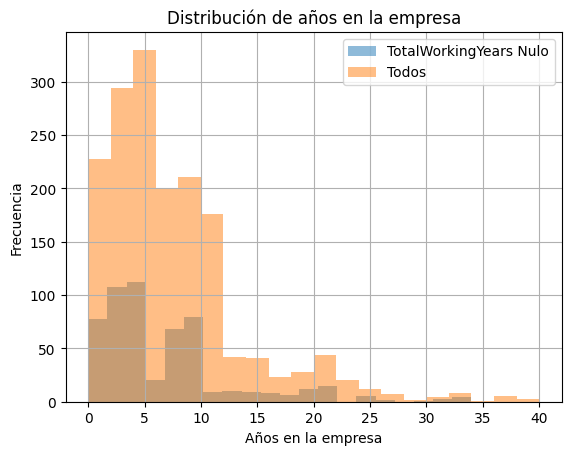

**Conclusión:**

Esto puede reflejar:
1. Los empleados con menos experiencia o en puestos más junior pueden no reportar su experiencia laboral total.
2. Error por cómo se recopila la información.

Aquí nuestra relación entre ``totalworkingyears`` sin nulos y ``yearsatcompany``:

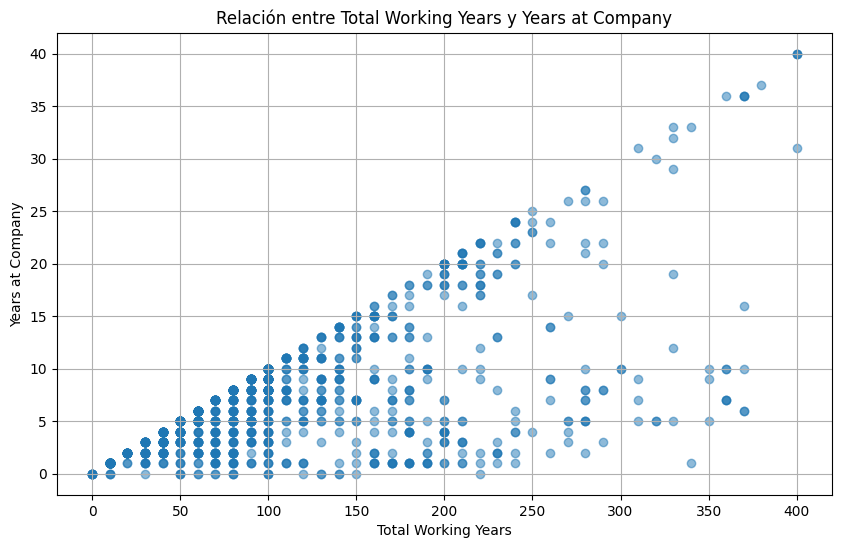



No obstante:

La presencia de nulos en los rangos laborales (``jobrole``) no parecen tener relación alguna con el departamento al que pertenecen (``department``).

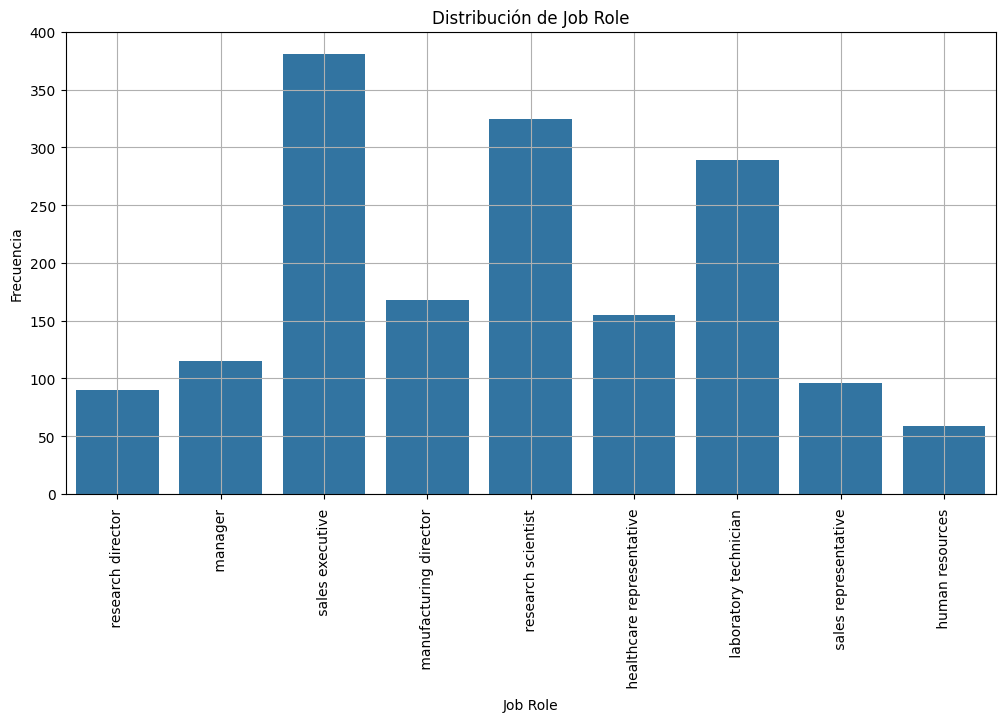

**Conclusión:** No están sesgados hacia un grupo específico de empleados en términos de rol o nivel.

**Propuesta de mejora:** Dejar los nulos: Si el análisis lo permite, dejar los nulos como están y tratarlos como una categoría especial (``Desconocido``).

**Mejoras aplicadas**: Se han normalizado formatos en la copia de la columna jobrole.

**Justificación:** Evita introducir sesgos y refleja la realidad de los datos faltantes.

En última instancia podemos decidir no volcar el alto número de nulos a SQL, pero no obstante convervar la información.

**Conclusión global de las columnas observadas:** La mayoría de los empleados con ``totalworkingyears`` nulo tienen menos de 5 años en la compañía, pero no hay un patrón presente por **rol** o **departamento**.

### Código de comprobaciones: 

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("raw_data_copia.csv", index_col= 0) ## de cara a la exportación para no duplicar el index fantasma

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dailyrate,1678.0,668.079714,470.787298,104.103175,290.035510,556.256661,971.956349,2063.388889
distancefromhome,1678.0,4.504172,14.652066,-49.000000,2.000000,5.000000,11.000000,29.000000
education,1678.0,2.932658,1.024270,1.000000,2.000000,3.000000,4.000000,5.000000
employeecount,1678.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
employeenumber,1678.0,809.859952,467.084867,1.000000,403.250000,813.500000,1215.750000,1614.000000
environmentsatisfaction,1678.0,4.264005,6.912695,1.000000,2.000000,3.000000,4.000000,49.000000
gender,1678.0,0.398689,0.489774,0.000000,0.000000,0.000000,1.000000,1.000000
hourlyrate,411.0,83.140768,57.272101,13.012897,36.254439,69.532083,116.987103,255.963294
jobinvolvement,1678.0,2.740763,0.710359,1.000000,2.000000,3.000000,3.000000,4.000000
joblevel,1678.0,2.064362,1.099425,1.000000,1.000000,2.000000,3.000000,5.000000


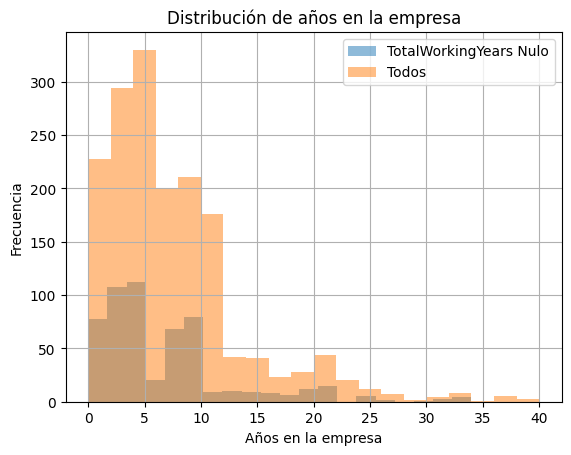

In [18]:
# Filtramos registros donde totalworkingyears es nulo (trabajamos con la copia)
df_null_totalworkingyears = df[df['totalworkingyears'].isnull()].copy()

# Histograma (registros con totalworkingyears nulo)
df_null_totalworkingyears['yearsatcompany'].hist(bins=20, alpha=0.5, label='TotalWorkingYears Nulo')

# Histograma para todos los registros
df['yearsatcompany'].hist(bins=20, alpha=0.5, label='Todos')

plt.legend()
plt.xlabel('Años en la empresa')
plt.ylabel('Frecuencia')
plt.title('Distribución de años en la empresa')
plt.show()



Muestra aleatoria en totalworkingyears sin limpiar:
1352     NaN
1585    20,0
366      NaN
22      17,0
457      NaN
Name: totalworkingyears, dtype: object
------------------------------------
Muestra aleatoria después de limpieza:
      totalworkingyears
1269              170.0
677               120.0
193               110.0
1189               80.0
1241              210.0


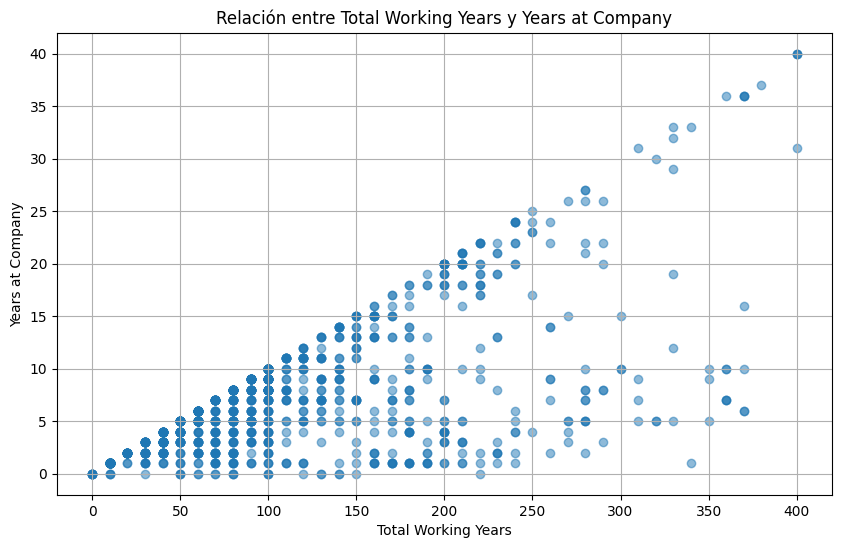

In [19]:
# Antes de modificar
print("\nMuestra aleatoria en totalworkingyears sin limpiar:")
print(df['totalworkingyears'].sample(5))
print('------------------------------------')

# Limpiamos y convertimos símbolos no numéricos (",")
df_notnull = df.dropna(subset=['totalworkingyears']).copy()
df_notnull['totalworkingyears'] = df_notnull['totalworkingyears'].str.replace(r'[^\d.]', '', regex=True).astype(float)

# Verificcamos
print("Muestra aleatoria después de limpieza:")
print(df_notnull[['totalworkingyears']].sample(5))

# Gráfrica
plt.figure(figsize=(10, 6))
plt.scatter(df_notnull['totalworkingyears'], df_notnull['yearsatcompany'], alpha=0.5)
plt.xlabel('Total Working Years')
plt.ylabel('Years at Company')
plt.title('Relación entre Total Working Years y Years at Company')
plt.grid(True)
plt.show()


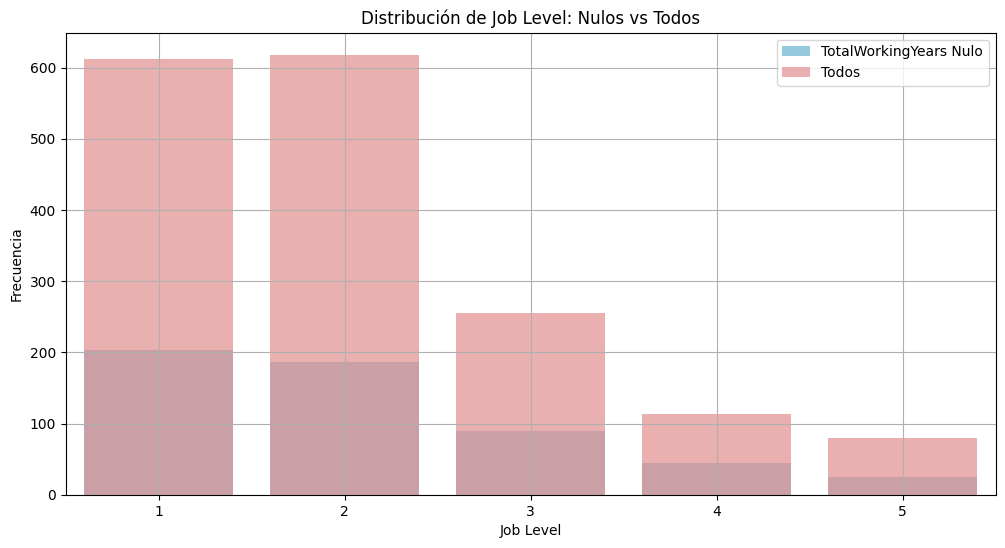

In [20]:

# Distribución de joblevel para registros nulos en totalworkingyears
plt.figure(figsize=(12, 6))
sns.countplot(data=df_null_totalworkingyears, x='joblevel', color='skyblue', label='TotalWorkingYears Nulo')

# La distribución de joblevel para todos los registros
sns.countplot(data=df, x='joblevel', color='lightcoral', alpha=0.7, label='Todos')

plt.xlabel('Job Level')
plt.ylabel('Frecuencia')
plt.title('Distribución de Job Level: Nulos vs Todos')
plt.legend()
plt.grid(True)
plt.show()


Valores nulos en department: 1366

Valores únicos en jobrole:
1.  research director 
2.  manager 
3.  sales executive 
4.  manufacturing director 
5.  research scientist 
6.  healthcare representative 
7.  laboratory technician 
8.  sales representative 
9.  human resources 


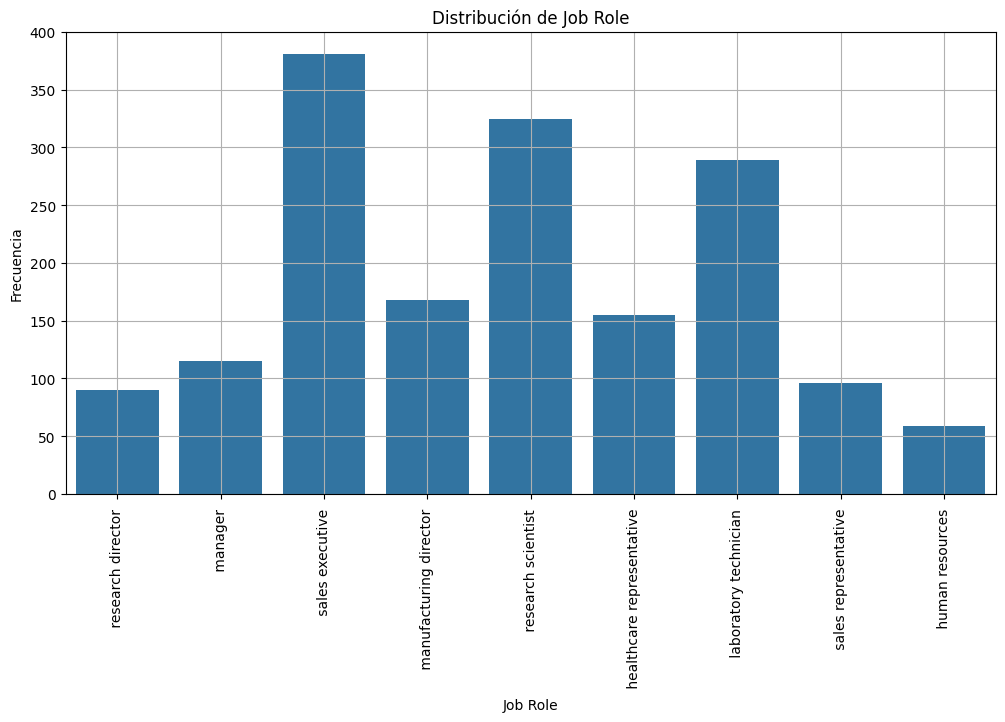

In [21]:
# Normalizamos la columna jobrole a minúsculas
df['jobrole'] = df['jobrole'].str.lower()

# Guardamos en variable los valores nulos en department
nulos_department = df['department'].isnull().sum()
print(f"Valores nulos en department: {nulos_department}")

# Iteramos por los valores únicos en jobrole (ya normalizados)
print("\nValores únicos en jobrole:")
for i, role in enumerate(df['jobrole'].unique(), 1):
    print(f"{i}. {role}")

# Visualizamos la distribución de jobrole
if not df['jobrole'].empty:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='jobrole')
    plt.xticks(rotation=90)
    plt.xlabel('Job Role')
    plt.ylabel('Frecuencia')
    plt.title('Distribución de Job Role')
    plt.grid(True)
    plt.show()
else:
    print("No hay datos en la columna 'jobrole'.")

